# Лабораторная работа №4

## Распознавание рукописных символов

## Выполнил студент группы БФИ1901 Кумма Кирилл Сергеевич

### Цель

  Реализовать классификацию черно-белых изображений рукописных цифр (28x28) по 10 категориям (от 0 до 9).
### Задачи
- Ознакомиться с представлением графических данных
- Ознакомиться с простейшим способом передачи графических данных нейронной
сети
- Создать модель
- Настроить параметры обучения
- Написать функцию, позволяющая загружать изображение пользователи и
классифицировать его

# Выполнение работы

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

2022-03-28 18:58:26.706917: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-28 18:58:26.706948: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


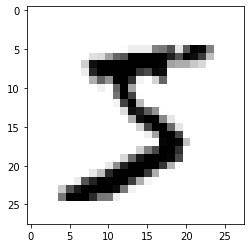

In [2]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.show()

In [3]:
print(train_labels[0])

5


In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:

model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

2022-03-28 18:58:30.089374: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-28 18:58:30.089410: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-28 18:58:30.089440: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (macbook-pro): /proc/driver/nvidia/version does not exist
2022-03-28 18:58:30.089701: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2022-03-28 18:58:30.525551: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 2s 3ms/step - loss: 0.3055 - accuracy: 0.9151
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1342 - accuracy: 0.9607
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0886 - accuracy: 0.9747
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0658 - accuracy: 0.9811
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0518 - accuracy: 0.9850


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9767
test_acc: 0.9767000079154968


### Изменение архитектуры путём добавления промежуточного слоя с 128 нейронами

In [10]:
model_layer = Sequential()
model_layer.add(Flatten())
model_layer.add(Dense(256, activation='relu'))
model_layer.add(Dense(128, activation='relu'))
model_layer.add(Dense(10, activation='softmax'))

model_layer.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model_layer.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2022-03-28 18:58:40.389407: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 2s 4ms/step - loss: 0.2703 - accuracy: 0.9224
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1044 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0689 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0489 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0370 - accuracy: 0.9884


In [11]:
test_loss, test_acc = model_layer.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0763 - accuracy: 0.9759
test_acc: 0.9758999943733215


#### Изменение оптимизаторов и их параметров

### 1 модель


In [12]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(optimizer='nadam',loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2022-03-28 18:58:51.286394: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 3s 5ms/step - loss: 0.3125 - accuracy: 0.9165
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1318 - accuracy: 0.9628
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0890 - accuracy: 0.9746
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0652 - accuracy: 0.9814
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0508 - accuracy: 0.9852


In [13]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0718 - accuracy: 0.9782
test_acc: 0.9782000184059143


### Изменение параметров

In [14]:
model1_2 = Sequential()
model1_2.add(Flatten())
model1_2.add(Dense(256, activation='relu'))
model1_2.add(Dense(10, activation='softmax'))
opt = tf.keras.optimizers.Nadam(learning_rate=0.01, beta_1 = 0.1, beta_2 = 0.3)

model1_2.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model1_2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2022-03-28 18:59:04.709455: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 3s 5ms/step - loss: 0.3175 - accuracy: 0.9169
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1984 - accuracy: 0.9640
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1690 - accuracy: 0.9726
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1603 - accuracy: 0.9774
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1477 - accuracy: 0.9806


In [15]:
test_loss, test_acc = model1_2.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2616 - accuracy: 0.9733
test_acc: 0.9732999801635742


### 2 модель

In [16]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2022-03-28 18:59:18.455268: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 2s 3ms/step - loss: 1.0993 - accuracy: 0.7471
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5255 - accuracy: 0.8688
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4248 - accuracy: 0.8868
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3790 - accuracy: 0.8966
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3505 - accuracy: 0.9028


In [17]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.9112
test_acc: 0.9111999869346619


### Изменение параметров

In [18]:
model2_2 = Sequential()
model2_2.add(Flatten())
model2_2.add(Dense(256, activation='relu'))
model2_2.add(Dense(10, activation='softmax'))
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.0, nesterov=False )

model2_2.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model2_2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.1242 - accuracy: 0.7447
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5340 - accuracy: 0.8688
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4283 - accuracy: 0.8878
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3802 - accuracy: 0.8974
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3508 - accuracy: 0.9035


In [19]:
test_loss, test_acc = model2_2.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.9119
test_acc: 0.911899983882904


### 3 Модель

In [20]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2890 - accuracy: 0.9192
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1275 - accuracy: 0.9627
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0874 - accuracy: 0.9747
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0655 - accuracy: 0.9805
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0505 - accuracy: 0.9853


In [21]:
test_loss, test_acc = model3.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9754
test_acc: 0.9753999710083008


### Изменение параметра скорости обучения

In [22]:
model3_3 = Sequential()
model3_3.add(Flatten())
model3_3.add(Dense(256, activation='relu'))
model3_3.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho = 0.2)

model3_3.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model3_3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.3358 - accuracy: 0.9154
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2126 - accuracy: 0.9644
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1900 - accuracy: 0.9715
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1789 - accuracy: 0.9763
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1645 - accuracy: 0.9800


In [23]:
test_loss, test_acc = model3_3.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2721 - accuracy: 0.9724
test_acc: 0.9724000096321106


### Распознавание изображения

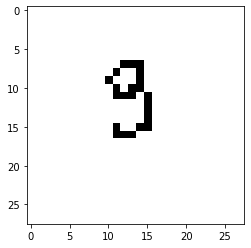

In [232]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'test.png'
img = image.load_img(img_path, target_size=(28,28),grayscale=True)
plt.imshow(img,cmap='gray')
plt.show()

x = image.img_to_array(img)
x = 255 - x
x /= 255
x = np.expand_dims(x, axis = 0)


In [233]:
prediction = model_layer.predict(x)
result = np.argmax(prediction)
print(result)

9
